<a href="https://colab.research.google.com/github/Linda-Agesa/French--Autolib-Car-Sharing-Service/blob/master/Autolib_Car_Sharing_Service.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autolib Car Sharing Service - Electric Car Usage

## Background of the Business
> In Paris, cars are on the road for only about 5% of the time and remain parked the 95% of the remaining time.To address this problem, the autolib company was formed.

> Autolib is a car sharing service company that provides easy and covenient access to electric cars, operating in several French cities. There are three types of cars to choose from, the Bluecar(which is the primary car) or the utility cars Utilib and Utilib 14.
The service is attained through subscription after which the subscriber receives a Radio Frequency Identification (RFID) badge.
The scheme allows a driver to rent a car at a station and return it to a station in a different location at a nominal charge.
By use of the RFID, an invoice is charged to a subscriber's account on their usage.

> In the city of Paris, a driver is estimated to save about 7,000 Euros per year by using the Autolib service in the stead of buying a car.

## Problem Statement
>From the initial 250 vehicles, the program grew to 1,750 electric vehicles and more than 5,000 charge points at 710 stations in  2012 in  Paris. With a significant increase of the number of both short-term and annual subscribers, Autolib plans to initiate the final stage of expansion to provide 3,000 electric cars. We will analyze the trend in the market and the impact of injecting more cars in circulation to the business. 


## Research Question 

> We are tasked to investgate the probability of X number of Bluecars being used within a 5-day week of weekdays only.
> ### Hypothesis Statement
>
>
> During the initiation of the project, area was assigned the same number of electric vehicles as the analysis before the launch showed that the average demand of electric cars was equal or close to equal. It is claimed that some areas, for example, the postal code area 75015 is said to have a greater average than the area of postal code 95880. We will test this claim to determine whether there is a significant difference in the average demand in different geographical areas.

> $μ_1$ = average demand for postal 75015

>$μ_2$ = average demand for postal 95880




---



>#### Null Hypothesis
>$H_0 : μ_1  = μ_2 $
>#### Alternative Hypothesis
>$H_1 : μ_1 ≠ μ_2$
---


## Research Design

>#### True Experimental Research Design
>This is the methodology we will to use for this research experiment.
>
>A true experiment research design is a type of experimental design used to test and >reject or fail to reject a hypothesis by using statistical analysis as the means of >investigation. This type of experiment can also be used to determine cause and effect >relationships within groups.
>
>The following are the assumptions that must be satisfied in order to use the true >experiment research design :
>
>- Control group and experimental group
>- Researcher - manipulated variable(s)
>- Random distribution


## Sampling Technique

> We will implement a **Simple Random Sampling Technique**. We will use this technique for the following reasons:
>
> 1. Simple random sampling gives every unit an equal chance of being selected thus we can comfortably make generalizations from the statistrical analysis of our sample  to the population.
>2. Chances of bias is greatly reduced.
>3. Our data is complete.

## Project Plan

> This project was carried out using the following procession:
>1. Research pertaining to the business was carried out to better understand the business and the nature of Autolib's business problem.
2. Definition of the research question .
3. Determining the objectives of the research and the metrics for evaluation.
4. Collection of data
5. Exploration of the data.
6. Data preparation and cleaning.
7. Implementing the solution:
   - Sampling
   - Hypothesis testing
   - Prediction
8. Challenging the solution
9. Evaluation of the solution
10. Summary of findings
11. Conclusions


## Metrics For Success

> - Concluding on a hypothesis test given a 95% confidence interval
> - Attaining a prediction for the increase in future demand(6 months). A probability of 60% is desired for the rollout of the next explansion plan to be implemented.

## Loading Our Libraries and Files

In [0]:
# Loading the necessary libaries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson
from scipy import stats
from scipy.stats import shapiro
from statsmodels.stats import weightstats as stests


In [40]:
# Importing our files

# Lets import the description table for the columns in our file

description = pd.read_excel('columns_explanation.xlsx')
description

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [41]:
# Importing our data file to the environment

autolib_df = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
autolib_df.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


- After reading and loading the file to our environment, we display the first five records of our dataset. 

In [42]:
autolib_df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


- This displays the last five records of our data.

## Analysis

> While carrying out our analysis, we aim to investigate the properties of our dataset to have a better understanding of thge before we can implement the solution to the problem. 

#### Exploring our Columns

In [43]:
# Checking the datatypes of our columns

autolib_df.dtypes
autolib_df.describe()


,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


- We have two object column datatypes (date and day_type). All the rest have been captured as numeric datatypes.

In [44]:
autolib_df.columns 

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

- The column names of our dataframe are not consistent from one column to the other. We have observed the following inconsistencies:
  - Some column names are all in lowercase while others both lower and uppercase
  - Some columns names with multiple words are separated by space while others by the underscore.
  - Some words in the column names to not have a separator.

- We will do a quick clean up of our column names to have them in a uniform and consistent form to call them easily without having to go back to the dataframe to confirm the name of a particular column.

In [45]:
# Making the column names uniform.

autolib_df.columns = autolib_df.columns.str.replace(' ', '_').str.replace('dayOfWeek', 'day_of_week').str.strip().str.lower()  # Dealing with the inconsistencies

autolib_df.columns      # Displaying column names

Index(['postal_code', 'date', 'n_daily_data_points', 'day_of_week', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

- Displaying the column names, we can confirm that the inconsistencies have been dealt with.

##### Checking for Unique Values in Particular Columns 

- We will check for the unique values and their count in the following columns
  - Postal code
  - Day of the Week
  - Day type

In [46]:
print('Postal Code : There are ', autolib_df['postal_code'].nunique(), 'unique values')
print(autolib_df['postal_code'].unique())

print('\n')
      
print('Day of the Week : There are', autolib_df['day_of_week'].nunique(), 'unique values' )
print(autolib_df['day_of_week'].unique())

print('\n')

print('Day Type : There are', autolib_df['day_type'].nunique(), 'unique values')
print(autolib_df['day_type'].unique())
      

Postal Code : There are  104 unique values
[75001 75002 75003 75004 75005 75006 75007 75008 75009 75010 75011 75012
 75013 75014 75015 75016 75017 75018 75019 75020 75112 75116 78000 78140
 78150 91330 91370 91400 92000 92100 92110 92120 92130 92140 92150 92160
 92170 92190 92200 92210 92220 92230 92240 92250 92260 92270 92290 92300
 92310 92320 92330 92340 92350 92360 92370 92380 92390 92400 92410 92420
 92500 92600 92700 92800 93100 93110 93130 93150 93170 93200 93230 93260
 93300 93310 93350 93360 93370 93390 93400 93440 93500 93600 93700 93800
 94000 94100 94110 94120 94130 94140 94150 94160 94220 94230 94300 94340
 94410 94450 94500 94700 94800 95100 95870 95880]


Day of the Week : There are 7 unique values
[0 1 2 3 4 5 6]


Day Type : There are 2 unique values
['weekday' 'weekend']


- We have 104 unique area postal codes, 7 days in a week and the days are classified into weekends and weekdays

#### Checking for Duplicate Rows

In [47]:
# Let's see the shape of our dataset to begin with.

autolib_df.shape

(16085, 13)

- Our DataFrame has 16,085 records with 13 attributes each.


In [48]:
duplicated = len(autolib_df[autolib_df.duplicated(keep = 'first') == True])

print( 'We have', duplicated, 'duplicate rows in our dataframe')

We have 0 duplicate rows in our dataframe


## Univariate EDA

### Non-Graphical Analysis

- For non-graphical EDA analysis, we will carry out the following investigations on our data:
  - Measures of Central Tendency. This includes determining the mean, mode and median.
  - Measures of Dispersion. Involves calculating the variance, standard deviation and interquartile range (IQR)

#### Calculating Summary Statistics of Variables

In [49]:
# We can calculate the summary statistics of the variables using the describe() function
#
autolib_df.describe()

,postal_code,n_daily_data_points,day_of_week,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


#### Mean 

##### 1. Mean of Numerical Attributes for the entire dataset

In [50]:
# MEAN
#
# Lets calculate the average of the data in the numerical attributes

print('Bluecars taken mean    : ', autolib_df.bluecars_taken_sum.mean())
print('Bluecars returned mean : ', autolib_df.bluecars_returned_sum.mean())
print('Utilib taken mean      : ', autolib_df.utilib_taken_sum.mean())
print('Utilib returned mean   : ', autolib_df.utilib_returned_sum.mean())
print('Utilib 14 taken mean   : ', autolib_df.utilib_14_taken_sum.mean())
print('Utilib 14 returned mean : ', autolib_df.utilib_14_returned_sum.mean())
print('slots  freed mean      : ', autolib_df.slots_freed_sum.mean())
print('slots  taken mean      : ', autolib_df.slots_taken_sum.mean())

Bluecars taken mean    :  125.92695057506994
Bluecars returned mean :  125.912713708424
Utilib taken mean      :  3.69829033260802
Utilib returned mean   :  3.6990985390115014
Utilib 14 taken mean   :  8.600559527510102
Utilib 14 returned mean :  8.599191793596518
slots  freed mean      :  22.62903326080199
slots  taken mean      :  22.629281939695367


##### 2. Mean of Bluecars taken  on weekdays

In [51]:
# First we take a subset of our data where the type of day is a weekday
#
autolib_weekdays = autolib_df[autolib_df.day_type == 'weekday']  # Obtaining a subset of the data

weekly_mean = round(autolib_weekdays.bluecars_taken_sum.sum()/ (140 * 5)) # Calculating the weekly mean of bluecars
weekly_mean

1913.0

#### Mode

In [52]:
print('Bluecars taken mode    : ', autolib_df.bluecars_taken_sum.mode())
print('Bluecars returned mode : ', autolib_df.bluecars_returned_sum.mode())
print('Utilib taken mode      : ', autolib_df.utilib_taken_sum.mode())
print('Utilib returned mode   : ', autolib_df.utilib_returned_sum.mode())
print('Utilib 14 taken mode   : ', autolib_df.utilib_14_taken_sum.mode())
print('Utilib 14 returned mode : ', autolib_df.utilib_14_returned_sum.mode())
print('slots  freed mode      : ', autolib_df.slots_freed_sum.mode())
print('slots  taken mode      : ', autolib_df.slots_taken_sum.mode())

Bluecars taken mode    :  0    12
dtype: int64
Bluecars returned mode :  0    13
dtype: int64
Utilib taken mode      :  0    0
dtype: int64
Utilib returned mode   :  0    0
dtype: int64
Utilib 14 taken mode   :  0    0
dtype: int64
Utilib 14 returned mode :  0    0
dtype: int64
slots  freed mode      :  0    0
dtype: int64
slots  taken mode      :  0    0
dtype: int64


#### Median

In [53]:
print('Bluecars taken median    : ', autolib_df.bluecars_taken_sum.median())
print('Bluecars returned median : ', autolib_df.bluecars_returned_sum.median())
print('Utilib taken median      : ', autolib_df.utilib_taken_sum.median())
print('Utilib returned median   : ', autolib_df.utilib_returned_sum.median())
print('Utilib 14 taken median   : ', autolib_df.utilib_14_taken_sum.median())
print('Utilib 14 returned median : ', autolib_df.utilib_14_returned_sum.median())
print('slots  freed median      : ', autolib_df.slots_freed_sum.median())
print('slots  taken median      : ', autolib_df.slots_taken_sum.median())

Bluecars taken median    :  46.0
Bluecars returned median :  46.0
Utilib taken median      :  1.0
Utilib returned median   :  1.0
Utilib 14 taken median   :  3.0
Utilib 14 returned median :  3.0
slots  freed median      :  0.0
slots  taken median      :  0.0


#### Standard Deviaton
> Standard deviations is used to determine how much or how far the distribution points are spread from the mean. 

In [54]:
# Calculating standard deviation using the std() function for all numeric variables
#
print('Bluecars taken stdev   : ', autolib_df.bluecars_taken_sum.std())
print('Bluecars returned stdev : ', autolib_df.bluecars_returned_sum.std())
print('Utilib taken stdev      : ', autolib_df.utilib_taken_sum.std())
print('Utilib returned stdev   : ', autolib_df.utilib_returned_sum.std())
print('Utilib 14 taken stdev   : ', autolib_df.utilib_14_taken_sum.std())
print('Utilib 14 returned stdev : ', autolib_df.utilib_14_returned_sum.std())
print('slots  freed stdev      : ', autolib_df.slots_freed_sum.std())
print('slots  taken stdev      : ', autolib_df.slots_taken_sum.std())




Bluecars taken stdev   :  185.42657876727893
Bluecars returned stdev :  185.50153480148427
Utilib taken stdev      :  5.815057779367249
Utilib returned stdev   :  5.824634228651658
Utilib 14 taken stdev   :  12.870098297095637
Utilib 14 returned stdev :  12.868992936610336
slots  freed stdev      :  52.12026333757879
slots  taken stdev      :  52.146029870452566


#### Skewness
> We calculate the skewness of a variable to determine whether the distribution follows a perfectly normal symmetry or it is inclined to  either side more than the other. Skewness can be positive or negative  or neutral. A distribution that has a positive value for skewness is said to be skewed to the right while that which has a negative value for skewness is said to be skewed to the left.

In [55]:
print('Bluecars taken skewness   : ', autolib_df.bluecars_taken_sum.skew())
print('Bluecars returned skewness : ', autolib_df.bluecars_returned_sum.skew())
print('Utilib taken skewness      : ', autolib_df.utilib_taken_sum.skew())
print('Utilib returned skewness   : ', autolib_df.utilib_returned_sum.skew())
print('Utilib 14 taken skewness   : ', autolib_df.utilib_14_taken_sum.skew())
print('Utilib 14 returned skewness : ', autolib_df.utilib_14_returned_sum.skew())
print('slots  freed skewness      : ', autolib_df.slots_freed_sum.skew())
print('slots  taken skewness      : ', autolib_df.slots_taken_sum.skew())


Bluecars taken skewness   :  2.4063548974959086
Bluecars returned skewness :  2.412084978838923
Utilib taken skewness      :  2.5568719194754777
Utilib returned skewness   :  2.57866477971619
Utilib 14 taken skewness   :  2.5109244534822923
Utilib 14 returned skewness :  2.511487901149739
slots  freed skewness      :  2.5974057870090994
slots  taken skewness      :  2.5969043474634987


#### Kurtosis

In [56]:
print('Bluecars taken kurtosis   : ', autolib_df.bluecars_taken_sum.kurt())
print('Bluecars returned kurtosis : ', autolib_df.bluecars_returned_sum.kurt())
print('Utilib taken kurtosis      : ', autolib_df.utilib_taken_sum.kurt())
print('Utilib returned kurtosis   : ', autolib_df.utilib_returned_sum.kurt())
print('Utilib 14 taken kurtosis   : ', autolib_df.utilib_14_taken_sum.kurt())
print('Utilib 14 returned kurtosis : ', autolib_df.utilib_14_returned_sum.kurt())
print('Slots  freed kurtosis      : ', autolib_df.slots_freed_sum.kurt())
print('Slots  taken kurtosis      : ', autolib_df.slots_taken_sum.kurt())


Bluecars taken kurtosis   :  6.172692305510042
Bluecars returned kurtosis :  6.1862880957582345
Utilib taken kurtosis      :  7.702361895243428
Utilib returned kurtosis   :  7.93635700780893
Utilib 14 taken kurtosis   :  7.18681525579947
Utilib 14 returned kurtosis :  7.18546312191963
Slots  freed kurtosis      :  6.454514382612528
Slots  taken kurtosis      :  6.442553073772169


### Graphical Analysis

#### Histogram


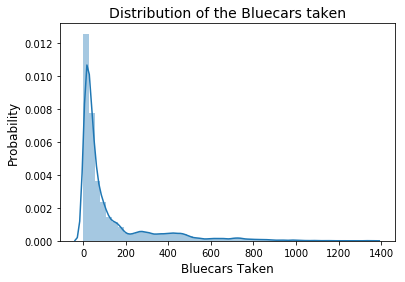

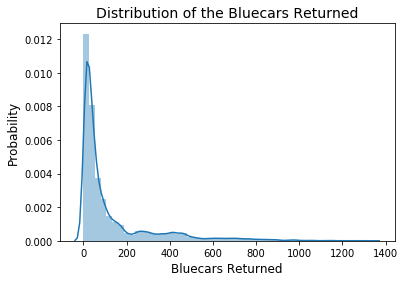

In [57]:
# Using the seaborn library to plot a histogram 
#

sns.distplot(autolib_df.bluecars_taken_sum, bins = None)


plt.xlabel('Bluecars Taken', color = 'black', fontsize =12)
plt.ylabel('Probability', color ='black', fontsize = 12)
plt.title('Distribution of the Bluecars taken', color = 'black', fontsize = 14)
plt.show()
print('\n')

sns.distplot(autolib_df.bluecars_returned_sum, bins = None)


plt.xlabel('Bluecars Returned', color = 'black', fontsize =12)
plt.ylabel('Probability', color ='black', fontsize = 12)
plt.title('Distribution of the Bluecars Returned', color = 'black', fontsize = 14)
plt.show()


In [59]:
autolib_df.head()

,postal_code,date,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


#### Bar Graphs

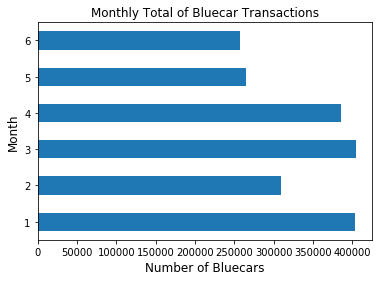

In [139]:
# Plotting the momthly 
autolib_df.groupby('month')['bluecars_taken_sum'].sum().plot.barh()
plt.xlabel('Number of Bluecars', fontsize = 12, color = 'black')
plt.ylabel('Month', fontsize = 12, color = 'black' )
plt.title('Monthly Total of Bluecar Transactions')
plt.show()


### Bivariate EDA

> Bivariate EDA is used to establish relationships that exist between various variables if any. For this analysis, we will use the following features:
  - Pearson Correlation
  - Heatmap 
  - Pairplots

#### Pearson Correlation

In [69]:
# Using the corr() function to find the coefficient of correlation
#
corr_df = autolib_df.corr() # This will return a table of the degree of correlation of each variable against all other variables.
corr_df

,postal_code,n_daily_data_points,day_of_week,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
postal_code,1.000000,0.000432,0.000343,-0.698020,-0.697519,-0.625521,-0.624786,-0.656744,-0.656516,-0.749528,-0.749157
n_daily_data_points,0.000432,1.000000,0.002039,0.029411,0.030063,0.022669,0.023322,0.025738,0.026351,0.020873,0.021169
day_of_week,0.000343,0.002039,1.000000,0.079649,0.081954,0.069295,0.071713,0.068790,0.071279,0.049960,0.050468
bluecars_taken_sum,-0.698020,0.029411,0.079649,1.000000,0.998660,0.893833,0.892850,0.940946,0.940757,0.948575,0.947996
bluecars_returned_sum,-0.697519,0.030063,0.081954,0.998660,1.000000,0.893613,0.893268,0.940542,0.941117,0.948258,0.948771
utilib_taken_sum,-0.625521,0.022669,0.069295,0.893833,0.893613,1.000000,0.981982,0.847519,0.846304,0.853760,0.853049
utilib_returned_sum,-0.624786,0.023322,0.071713,0.892850,0.893268,0.981982,1.000000,0.845645,0.845306,0.852939,0.852936
utilib_14_taken_sum,-0.656744,0.025738,0.068790,0.940946,0.940542,0.847519,0.845645,1.000000,0.992062,0.899232,0.898719
utilib_14_returned_sum,-0.656516,0.026351,0.071279,0.940757,0.941117,0.846304,0.845306,0.992062,1.000000,0.899442,0.899777
slots_freed_sum,-0.749528,0.020873,0.049960,0.948575,0.948258,0.853760,0.852939,0.899232,0.899442,1.000000,0.999221


#### Heatmap
> Plot a heatmap to visualize the degree of correlation of our variables.

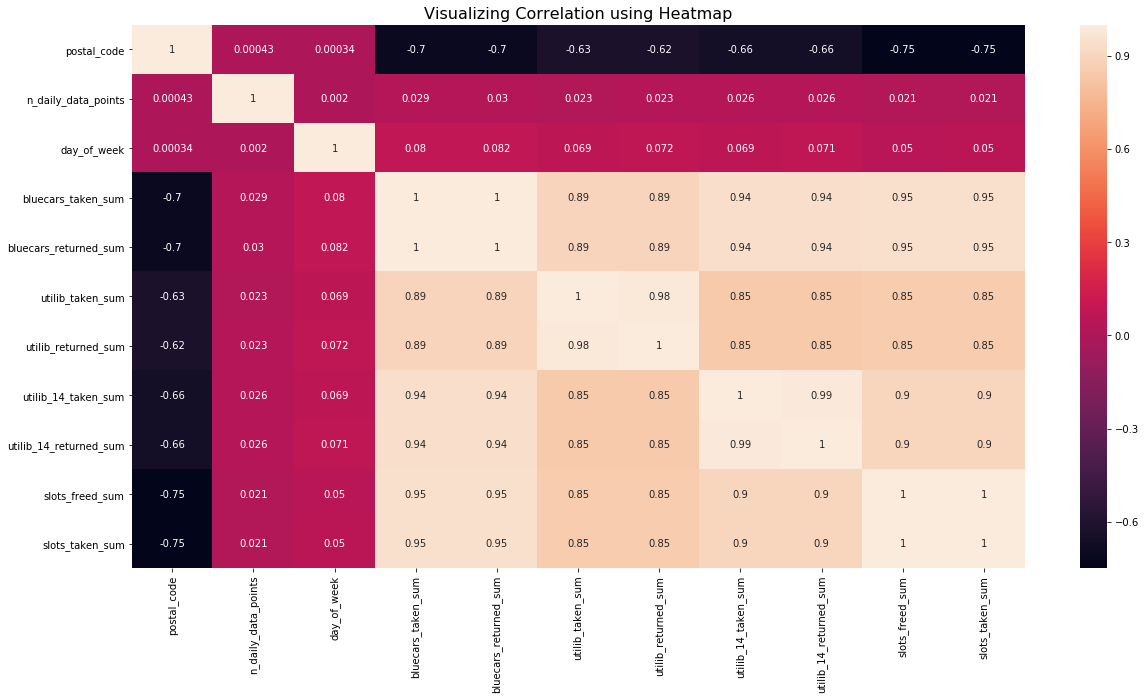

In [77]:
plt.subplots(figsize = (20,10))
sns.heatmap(corr_df, annot = True)
plt.title('Visualizing Correlation using Heatmap', fontsize = 16, color = 'black' )


plt.show()

#### PairPlots

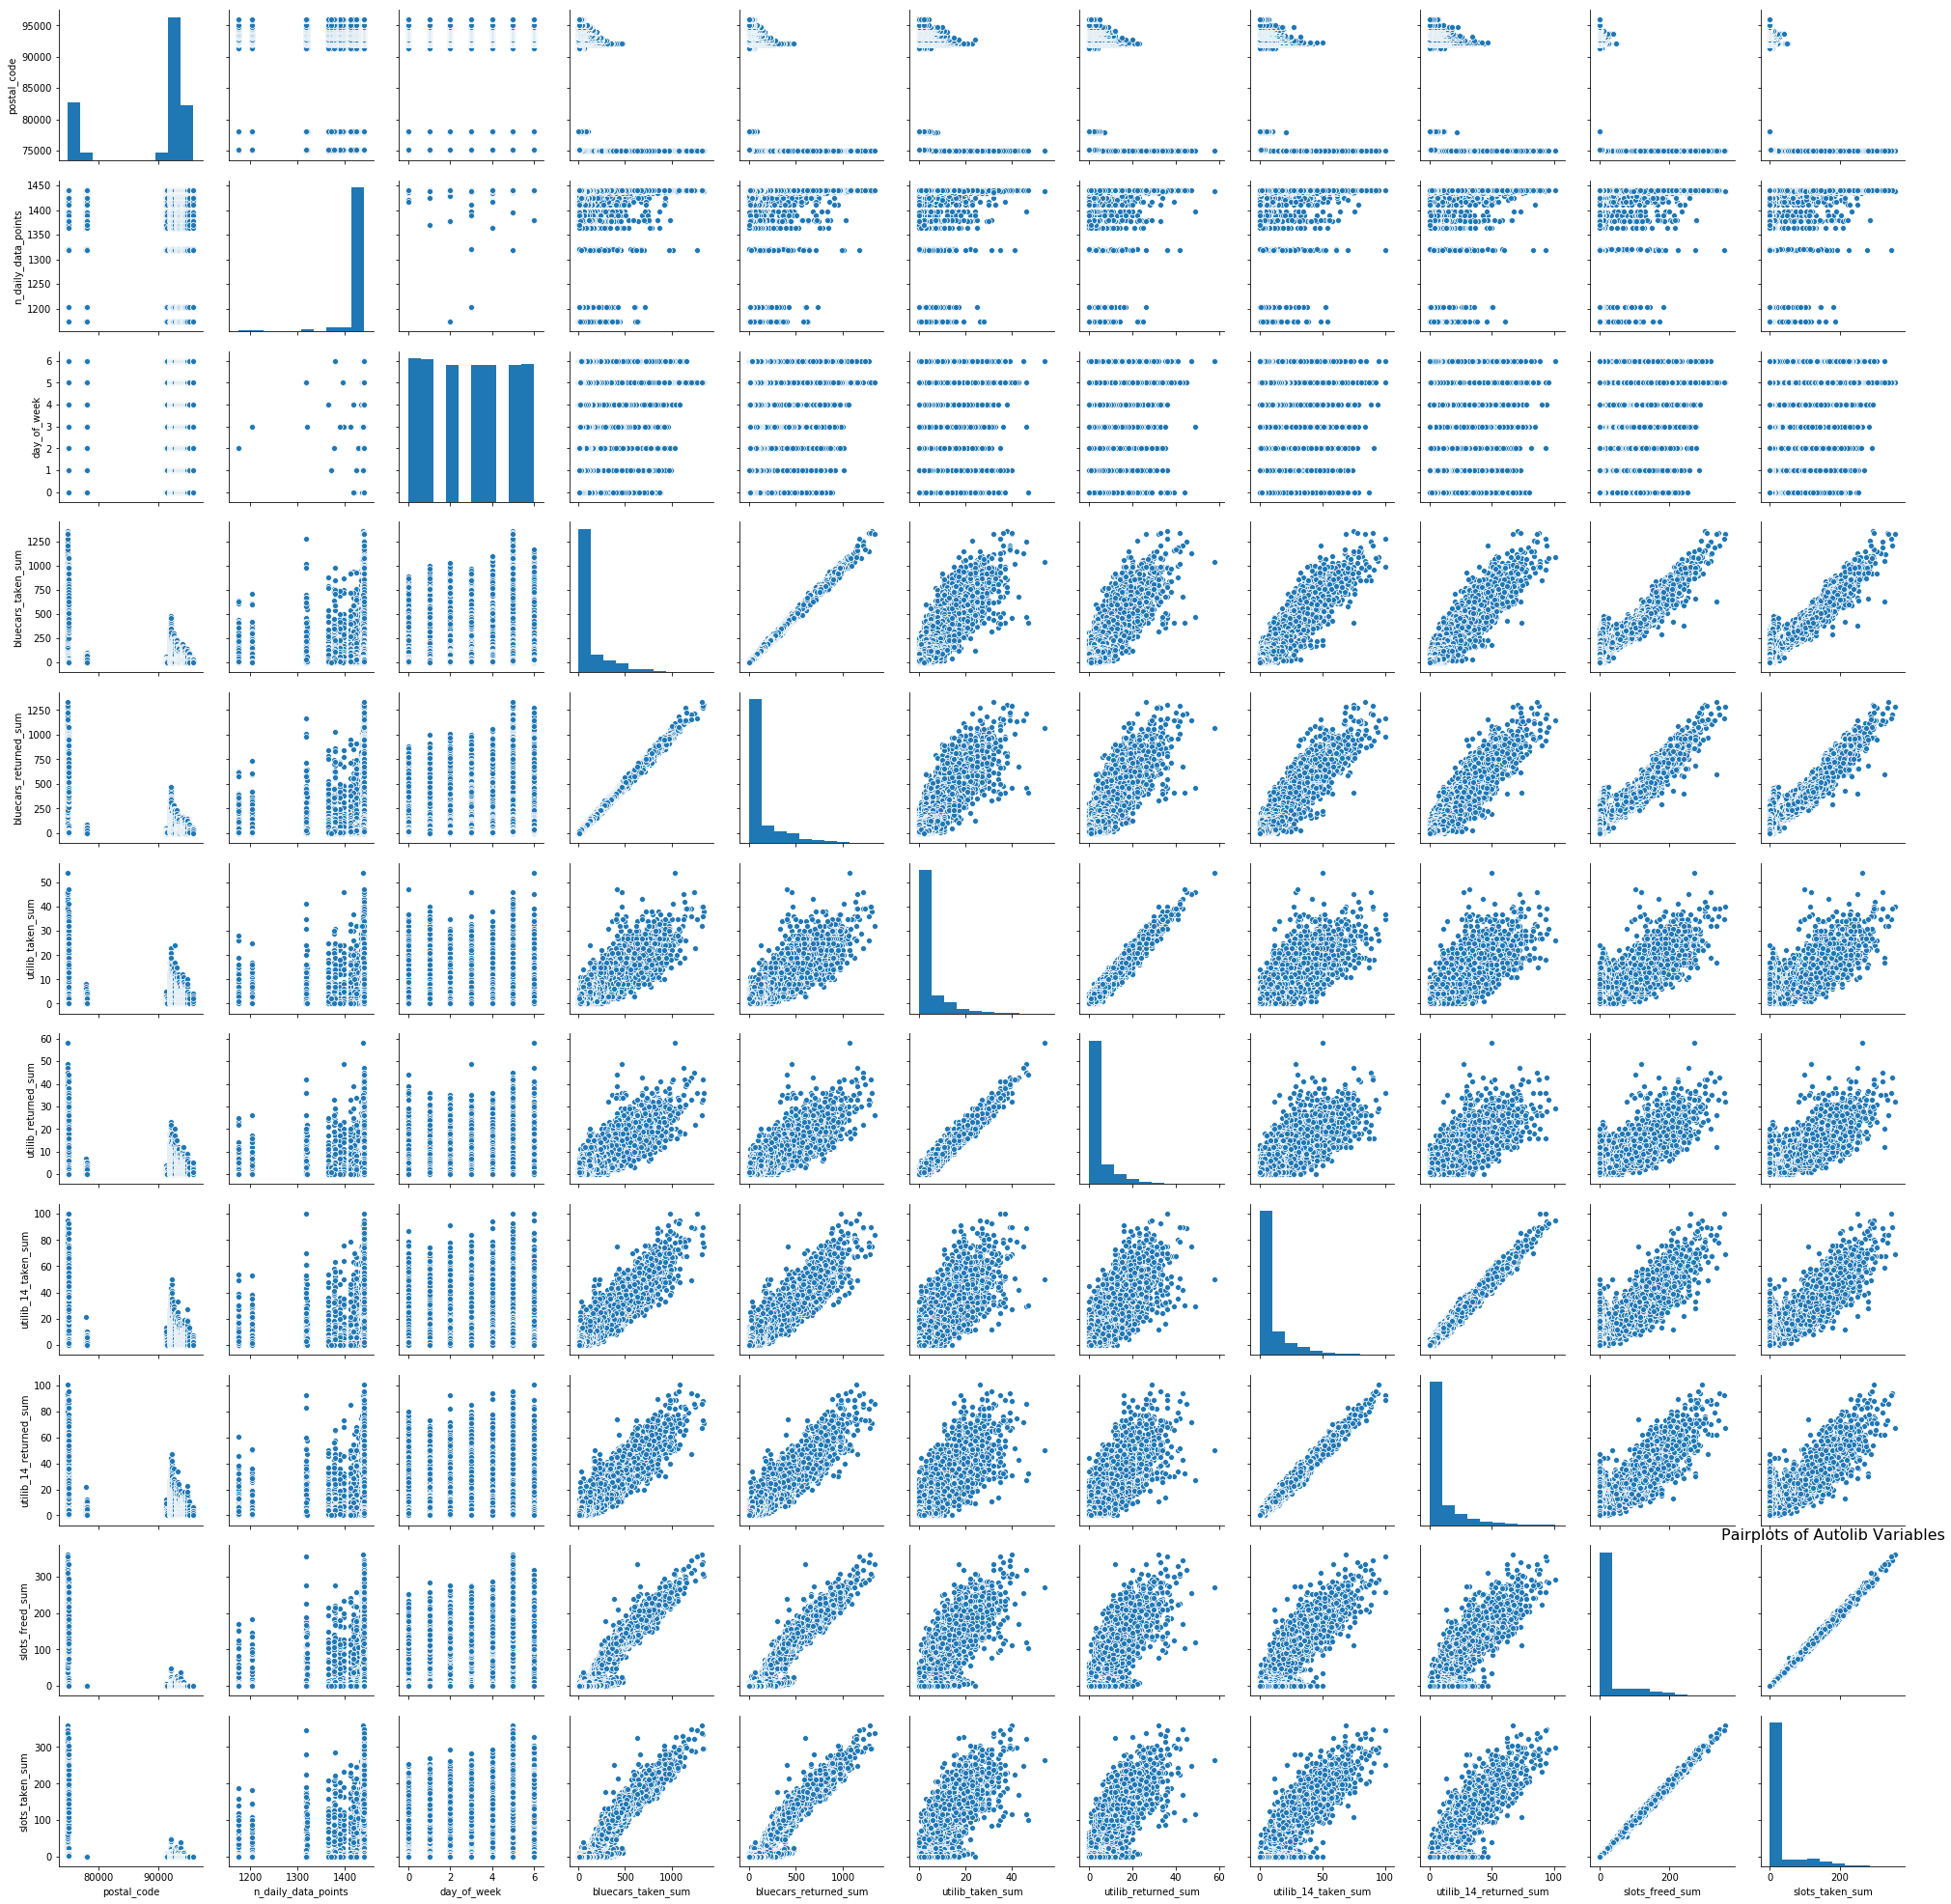

In [80]:
sns.pairplot(autolib_df)
plt.title('Pairplots of Autolib Variables', fontsize = 16, color = 'black')
plt.show()

#### Trend of Bluecar Usage 

In [0]:
# First we create a new column for the month by slicing the date column 
# We will specify the new column as categorical datatype.
#
autolib_df['month'] = autolib_df.date.str.slice(0, 1).astype('category') # Creating the new column month


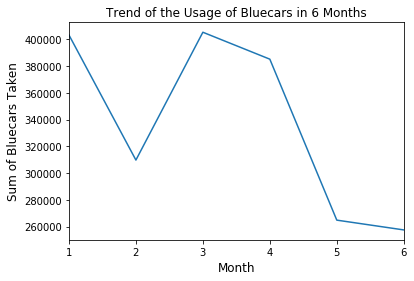

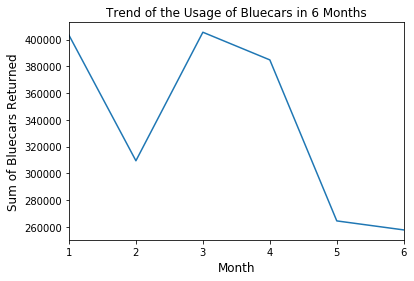

In [132]:
# We now plot a line graph showing the trend of the total usage of bluecars in each month.
#
autolib_df.groupby('month')['bluecars_taken_sum'].sum().plot()
plt.xlabel('Month', fontsize = 12, color = 'black')
plt.ylabel('Sum of Bluecars Taken', fontsize = 12, color = 'black')
plt.title('Trend of the Usage of Bluecars in 6 Months')

plt.show()
print('\n')

autolib_df.groupby('month')['bluecars_returned_sum'].sum().plot()
plt.xlabel('Month', fontsize = 12, color = 'black')
plt.ylabel('Sum of Bluecars Returned', fontsize = 12, color = 'black')
plt.title('Trend of the Usage of Bluecars in 6 Months')

plt.show()

- From the month of January toward February, the usage of bluecars drops by about 10,000 transactions.
- Between February and March, the transactions increase significantly.

- It is observed that there is a continous decrease of bluecar usage bwtween March and June. First a steady decline between March and April then a steep decline between April and May and finally a steady decline from May to June.

## Data Cleaning


#### Checking for Missing Values

In [64]:
autolib_df.isnull().sum()

postal_code               0
date                      0
n_daily_data_points       0
day_of_week               0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

- Great! The data does not have any missing values.

#### Outliers - Identifying and Dealing with Outliers

We will use box plots to identify outliers to check for outliers in the columns with numerical entries.


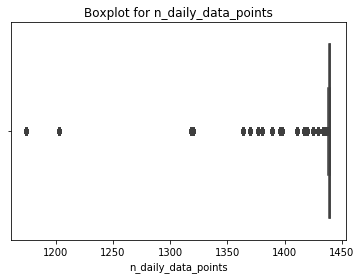

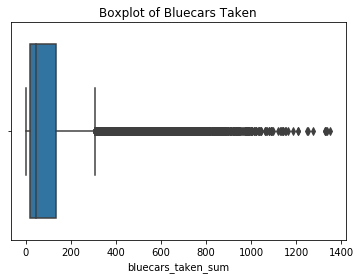

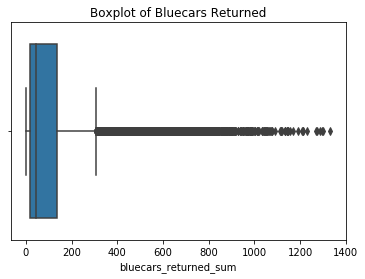

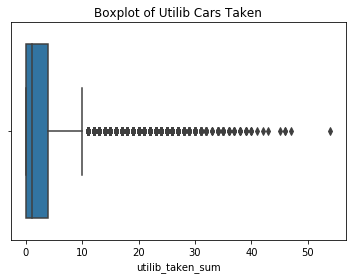

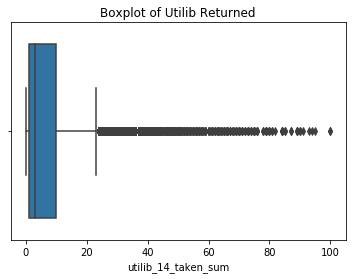

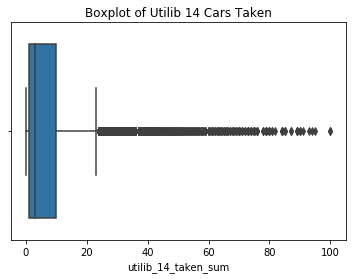

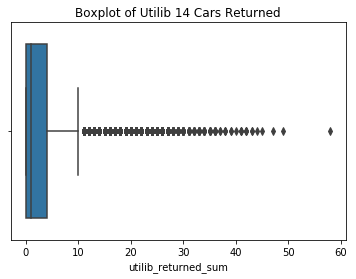

In [62]:
sns.boxplot(x = 'n_daily_data_points', data = autolib_df)
plt.title('Boxplot for n_daily_data_points')
plt.show()

sns.boxplot(x = 'bluecars_taken_sum', data = autolib_df)
plt.title('Boxplot of Bluecars Taken')
plt.show()

sns.boxplot(x = 'bluecars_returned_sum', data = autolib_df)
plt.title('Boxplot of Bluecars Returned')
plt.show()

sns.boxplot(x = 'utilib_taken_sum', data = autolib_df)
plt.title('Boxplot of Utilib Cars Taken')
plt.show()

sns.boxplot(x = 'utilib_14_taken_sum', data = autolib_df)
plt.title('Boxplot of Utilib Returned')
plt.show()

sns.boxplot(x = 'utilib_14_taken_sum', data = autolib_df)
plt.title('Boxplot of Utilib 14 Cars Taken')
plt.show()

sns.boxplot(x = 'utilib_returned_sum', data = autolib_df)
plt.title('Boxplot of Utilib 14 Cars Returned')
plt.show()

- There are a number outliers in all our variables. We will not remove the outliers as our data will be adversely affected.

## Implementing the Solution

#### Sampling 

> Before we commence the solution implementation, we first take a sample of the data from the population.
> We will implement a Simple Random Sampling Technique.

In [115]:
# Using the sample() function to select a random sample from our data to use for statistical analysis
#
autolib_sample = autolib_df.sample(n= 5000, axis = 0, replace = False) # Simple random sampling
autolib_sample.head()

,postal_code,date,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum,month
15216,94500,3/12/2018,1440,0,weekday,23,18,0,0,0,1,0,0,3
14267,94220,2/23/2018,1440,4,weekday,43,46,1,2,4,3,0,0,2
4098,91370,2/13/2018,1440,1,weekday,15,16,0,0,0,1,0,0,2
3489,78000,3/3/2018,1440,5,weekend,74,69,2,1,0,0,0,0,3
5692,92170,3/24/2018,1440,5,weekend,89,90,0,0,4,4,0,0,3


#### Test of Hypothesis

---



>#### Null Hypothesis
>$H_0 : μ_1  = μ_2 $
>#### Alternative Hypothesis
>$H_1 : μ_1 ≠ μ_2$
---

In [116]:
# First we find the subset of the data of the postal code  75015

autolib_75015 = autolib_sample[autolib_sample.postal_code == 75015]
autolib_75015

autolib_75015.shape

(39, 14)

In [117]:
# We also subset the data of the postal code 95880
#
autolib_95880 = autolib_sample[autolib_sample.postal_code == 95880]
autolib_95880.shape

(47, 14)

##### Normality Test

In [120]:
# We will test is the Bluecars Taken in the area of 75015 postal code for normality

stat, p = shapiro(autolib_75015.bluecars_taken_sum)
print('Statistic = %.3f, p = %.3f' % (stat, p))


# The confidence interval is defined as alpha
alpha = 0.05
if p > alpha:
  print('The bluecars taken follows a normal distribution')
else:
  print('The data does not follow a normal distribution')

Statistic = 0.815, p = 0.000
The data does not follow a normal distribution


In [121]:
# We will test is the Bluecars Taken in the area of 95880 postal code for normality

stat, p = shapiro(autolib_95880.bluecars_taken_sum)
print('Statistic = %.3f, p = %.3f' % (stat, p))


# The confidence interval is defined as alpha
alpha = 0.05
if p > alpha:
  print('The bluecars taken follows a normal distribution')
else:
  print('The data does not follow a normal distribution')

Statistic = 0.936, p = 0.013
The data does not follow a normal distribution


##### Applying the Z-Test
> We conduct a Z-Test as the final stage of calculations in the attemp to test our hypothesis.
> We conduct a Z-Test if:

>-  Our sample size is greater than 30
>-  Data points are independent from each other.
>-  Data is normally distributed. For sample size greater than 30, this does not always matter.
>-  Data should be randomnly selected.
>-  Sample size should be equal if at all possible.


> We will conduct a two sample z-test. We will check the two independent data groups to decide whether the sample mean of the two groups are equal or not.

In [125]:
ztest, p_value = stests.ztest(autolib_75015['bluecars_taken_sum'], x2 = autolib_95880['bluecars_taken_sum'], value = 0, alternative = 'two-sided')
print('p_value : ', float(p_value))

if p_value < 0.05:
  print('We reject the null hypothesis')
else:
  print('We fail to reject the null hypothesis')

p_value :  1.1799454701616717e-222
We reject the null hypothesis


- Statistical analysis shows that there is a significant difference in the mean of the two areas hence we reject the null hypothesis.

#### Predicting Future Demand.

> We wish to apply inferential statistics to infer how the future market demand of Autolib electric cars will look like in 6 months.
>
> We will use the poisson distibution to determine the probability of there being an increase in average demand given the number of Bluecars would be increased in the market.

##### Applying the Poisson Function
> ##### Why a poisson distribution?
> We wish to determine the probability of bluecars being taken 3000 times in a span of one week given that the average number times bluecars taken in general is 1913
> 
>
>Conditions for using a poisson distribution for prediction:
>
>- Each event is independent of all other events.
>- The probability that an event should occur in a given time is the same.
>- The average rate of events per unit time is constant.

In [130]:
# We use the poisson function for this prediction 
#
average = 1913
value = 2500

poisson.pmf(value, average)

1.8629013196793195e-38

- The probability of having an increase of bluecars taken to 2500 times in a week is extremely low.

## Appropriateness of the Data
> - The data contains most of the information needed to answer our main question.
>- The data is complete which increases the accuracy of the results we obtain.
- The data however does not explain the reasons for the trends observed hence more research is to be carried out to fill in the blanks.

## Summary of Findings

> - No missing values or duplicated records in our data.
-  Large number of outliers on variables.
-  The numerical variables to not follow a normal distribution.
-  Weekly mean of number of bluecars between Monday and Friday is 1913.
-  From the month of January toward February, the usage of bluecars drops by about 10,000 transactions.Between February and March, the transactions increase significantly.It is observed that there is a continous decrease of bluecar usage bwtween March and June. First a steady decline between March and April then a steep decline between April and May and finally a steady decline from May to June.
-  High correlation between numerical variables is registered.
-  In hypothesis testing, the p_value attained after the test statistic is applies is less than the level of significance.
-  The probablity of an increase in demand of the usage of bluecars is significantly low. 


## Conclusion
> - We reject the null hypothesis which states that the average usage of electric cars in different postal codes is equal.
-  Due to the low probability of increase demand, we inference that injection of more cars into the market will not bring a positive effect of the business.


## Recommendations
> - We recommend that the marketing department should carry out vigorous marketing of the service as the demand has been on a steady decline over the period of 6 months.
- The injection of new cars to the market should be postponed until the demand decline is rehabilitated.

## Next Steps
> - Further research of the market to be carried out to determine the cause of the decline on demand of Autolib's electric cars.
> 